In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import json

In [2]:
def getData(path,cols,timecCol='time'):
    df=pd.read_csv(path,sep='?',header=None, names=['str'])

    def mapTo(s):
        test = json.loads(s.replace("'",'"'))
        return test

    df['data'] = df['str'].apply(lambda s: mapTo(s))
    del df['str']

    for patt in cols: 
        df[patt] = df['data'].apply(lambda s: s[patt])
    del df['data']
    df.index = pd.to_datetime(df[timecCol])
    del df[timecCol]
    
    return df

data = getData(
    '/proyect-traiding/dataOut/simulation/data.csv', 
    ['price', 'm1', 'm2', 'm1_m2', 'time'])


orders = getData(
    '/proyect-traiding/dataOut/simulation/orders.csv', 
    ['price', 'order', 'time'])

In [3]:
orders

price  order
time                                 
2016-06-01 23:52:00  49.460000      2
2016-06-02 02:09:00  49.470000      1
2016-06-02 02:14:00  49.515000      1
2016-06-02 02:24:00  49.821077      2
2016-06-02 02:29:00  49.882222      2
2016-06-02 06:49:00  49.509286      1
2016-06-02 06:54:00  49.528333      1
2016-06-02 12:09:00  49.797187      2
2016-06-02 12:14:00  49.752000      2
2016-06-02 15:54:00  49.540000      1
2016-06-02 15:59:00  49.540000      1
2016-06-02 18:59:00  49.574286      2
2016-06-02 19:04:00  49.518750      2
2016-06-03 00:50:00  49.670000      1
2016-06-03 00:55:00  49.670000      1
2016-06-03 01:30:00  49.734000      2
2016-06-03 01:35:00  49.740000      2
2016-06-03 05:45:00  49.660000      1
2016-06-03 05:50:00  49.660000      1
2016-06-06 00:10:00  49.580000      2
2016-06-06 00:15:00  49.585000      2
2016-06-06 12:40:00  49.832500      1
2016-06-06 12:45:00  49.820000      1
2016-06-06 15:45:00  50.230000      2
2016-06-06 15:50:00  50.215556      2
2016-06-06 19:05:00  50.100000      1
2016-06-06 19:10:00  50.100000      1
2016-06-07 01:41:00  50.150000      2
2016-06-07 01:46:00  50.150000      2
2016-06-07 11:11:00  50.557778      1
...                        ...    ...
2016-07-18 03:28:00  45.839048      1
2016-07-18 03:33:00  45.870000      1
2016-07-18 13:08:00  45.231000      2
2016-07-18 13:13:00  45.166757      2
2016-07-18 18:03:00  45.270000      1
2016-07-18 18:08:00  45.260000      1
2016-07-19 01:05:00  45.130000      2
2016-07-19 01:10:00  45.093333      2
2016-07-19 06:00:00  45.100000      1
2016-07-19 06:05:00  45.091250      1
2016-07-19 06:50:00  45.450000      2
2016-07-19 06:55:00  45.444348      2
2016-07-19 10:20:00  44.976667      1
2016-07-19 10:25:00  44.933333      1
2016-07-19 19:05:00  44.680000      2
2016-07-19 19:10:00  44.680000      2
2016-07-20 00:23:00  44.780000      1
2016-07-20 00:28:00  44.780000      1
2016-07-20 00:33:00  44.780000      2
2016-07-20 00:38:00  44.780000      2
2016-07-20 03:18:00  44.586667      1
2016-07-20 03:23:00  44.575000      1
2016-07-20 06:28:00  44.640000      2
2016-07-20 06:33:00  44.645000      2
2016-07-20 07:58:00  44.105455      1
2016-07-20 08:03:00  43.930000      1
2016-07-20 11:43:00  45.050000      2
2016-07-20 11:48:00  45.050000      2
2016-07-20 15:48:00  44.940000      1
2016-07-20 15:53:00  44.940000      1

[317 rows x 2 columns]

In [4]:
orders['order2'] = orders['order']*2-3

position = 0
def changePos(s):
    global position
    position = position + s
    return position
orders['position'] = orders['order2'].apply(lambda order: changePos(order))


In [5]:
data['position'] = orders['position']
data['position'] = data['position'].fillna(method='ffill')
data

price         m1         m2  m1_m2  position
time                                                                 
2016-06-01 23:52:00  49.460000  49.410584  49.381420    1.0       1.0
2016-06-01 23:57:00  49.470000  49.415473  49.382705    1.0       1.0
2016-06-02 00:09:00  49.475000  49.418790  49.383872    1.0       1.0
2016-06-02 00:14:00  49.436250  49.420559  49.384675    1.0       1.0
2016-06-02 00:19:00  49.440000  49.420836  49.385533    1.0       1.0
2016-06-02 00:24:00  49.430000  49.420762  49.386247    1.0       1.0
2016-06-02 00:29:00  49.411176  49.419159  49.386549    1.0       1.0
2016-06-02 00:34:00  49.400000  49.418248  49.386692    1.0       1.0
2016-06-02 00:39:00  49.420000  49.417803  49.387121    1.0       1.0
2016-06-02 00:44:00  49.332000  49.415848  49.386530    1.0       1.0
2016-06-02 00:49:00  49.330000  49.414292  49.385864    1.0       1.0
2016-06-02 00:54:00  49.330000  49.412292  49.385078    1.0       1.0
2016-06-02 00:59:00  49.348000  49.411137  49.384621    1.0       1.0
2016-06-02 01:04:00  49.350000  49.410137  49.384264    1.0       1.0
2016-06-02 01:09:00  49.370000  49.410137  49.384828    1.0       1.0
2016-06-02 01:14:00  49.330000  49.408803  49.384756    1.0       1.0
2016-06-02 01:19:00  49.336667  49.407396  49.385137    1.0       1.0
2016-06-02 01:24:00  49.336667  49.405988  49.385994    1.0       1.0
2016-06-02 01:29:00  49.316667  49.404492  49.386518    1.0       1.0
2016-06-02 01:34:00  49.340000  49.404048  49.387290    1.0       1.0
2016-06-02 01:39:00  49.380000  49.404048  49.388861    1.0       1.0
2016-06-02 01:44:00  49.385000  49.403714  49.390718    1.0       1.0
2016-06-02 01:49:00  49.405000  49.403085  49.393236    1.0       1.0
2016-06-02 01:54:00  49.399474  49.402184  49.395586    1.0       1.0
2016-06-02 01:59:00  49.427692  49.401855  49.398457    1.0       1.0
2016-06-02 02:04:00  49.510000  49.402966  49.402655    1.0       1.0
2016-06-02 02:09:00  49.470000  49.403633  49.405798   -1.0       0.0
2016-06-02 02:14:00  49.515000  49.405522  49.408502   -1.0      -1.0
2016-06-02 02:19:00  49.621250  49.409772  49.412282   -1.0      -1.0
2016-06-02 02:24:00  49.821077  49.418685  49.417904    1.0       0.0
...                        ...        ...        ...    ...       ...
2016-07-20 13:33:00  44.940000  45.009411  44.666793    1.0       1.0
2016-07-20 13:38:00  44.940000  45.011086  44.678079    1.0       1.0
2016-07-20 13:43:00  44.940000  45.012197  44.688650    1.0       1.0
2016-07-20 13:48:00  44.940000  45.013086  44.700572    1.0       1.0
2016-07-20 13:53:00  44.940000  45.014420  44.715001    1.0       1.0
2016-07-20 13:58:00  44.940000  45.017901  44.732131    1.0       1.0
2016-07-20 14:03:00  44.940000  45.021123  44.747417    1.0       1.0
2016-07-20 14:08:00  44.940000  45.021790  44.763631    1.0       1.0
2016-07-20 14:13:00  44.940000  45.022679  44.779059    1.0       1.0
2016-07-20 14:18:00  44.940000  45.023123  44.793327    1.0       1.0
2016-07-20 14:23:00  44.940000  45.025123  44.808327    1.0       1.0
2016-07-20 14:28:00  44.940000  45.028235  44.822756    1.0       1.0
2016-07-20 14:33:00  44.940000  45.029346  44.837756    1.0       1.0
2016-07-20 14:38:00  44.940000  45.025123  44.853470    1.0       1.0
2016-07-20 14:43:00  44.940000  45.021568  44.868542    1.0       1.0
2016-07-20 14:48:00  44.940000  45.017123  44.883684    1.0       1.0
2016-07-20 14:53:00  44.940000  45.012679  44.898256    1.0       1.0
2016-07-20 14:58:00  44.940000  45.008235  44.912542    1.0       1.0
2016-07-20 15:03:00  44.940000  45.005790  44.926399    1.0       1.0
2016-07-20 15:08:00  44.940000  45.003346  44.938970    1.0       1.0
2016-07-20 15:13:00  44.940000  45.000901  44.948256    1.0       1.0
2016-07-20 15:18:00  44.940000  44.998457  44.958930    1.0       1.0
2016-07-20 15:23:00  44.940000  44.996012  44.968871    1.0       1.0
2016-07-20 15:28:00  44.940000  44.993568  44.975818    1.0       1.0
2016-07-20 15:33:00  44.940000  44.

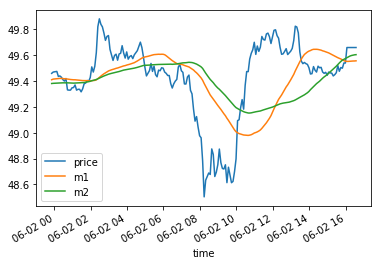

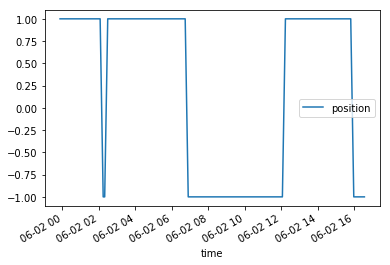

In [6]:
init=0
end=200
data[['price','m1','m2']].iloc[init:end].plot()
plt.show()
data[['position']].iloc[init:end].plot()
plt.show()

In [46]:
oldPosition = 0
oldPrice = 0

initialValue = 2000
units = 20
actualValue = initialValue

def returnsCalc(order):
    global oldPosition, oldPrice, units, actualValue
    
    returnTest = 0
    if(order['position'] == 0):
        if(oldPosition == 1):
            actualValue = actualValue + order['price'] * units
            
        elif(oldPosition == -1):
            actualValue = actualValue - order['price'] * units
    
        oldPosition = order['position']
    
    else:
        oldPosition = order['position']
        oldPrice = order['price']
        if(order['position'] == 1):
            actualValue = actualValue - order['price'] * units
        elif(order['position'] == -1):
            actualValue = actualValue + order['price'] * units
        
    return actualValue


orders['return'] = orders.apply(lambda order: returnsCalc(order), axis=1)

print(oldPosition)
if(oldPosition == 1):
    actualValue = actualValue + oldPrice * units

elif(oldPosition == -1):
    actualValue = actualValue - oldPrice * units
    

print(orders)
print(actualValue)

-1.0
                         price  order  order2  position       return
time                                                                
2016-06-01 23:52:00  49.460000      2       1         1  1010.800000
2016-06-02 02:09:00  49.470000      1      -1         0  2000.200000
2016-06-02 02:14:00  49.515000      1      -1        -1  2990.500000
2016-06-02 02:24:00  49.821077      2       1         0  1994.078462
2016-06-02 02:29:00  49.882222      2       1         1   996.434017
2016-06-02 06:49:00  49.509286      1      -1         0  1986.619731
2016-06-02 06:54:00  49.528333      1      -1        -1  2977.186398
2016-06-02 12:09:00  49.797187      2       1         0  1981.242648
2016-06-02 12:14:00  49.752000      2       1         1   986.202648
2016-06-02 15:54:00  49.540000      1      -1         0  1977.002648
2016-06-02 15:59:00  49.540000      1      -1        -1  2967.802648
2016-06-02 18:59:00  49.574286      2       1         0  1976.316934
2016-06-02 19:04:00  49.51875

In [47]:
initialValue

2000

In [48]:
actualValue

2040.836648603998

In [53]:
(((np.log(actualValue/initialValue))+1)**6-1)*100

12.757195040629776

In [50]:
(actualValue-initialValue)/initialValue*100

2.041832430199895

In [51]:
(actualValue-initialValue)

40.8366486039979